In [1]:
import torch
import torch.nn as nn
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
import torch.optim as optim

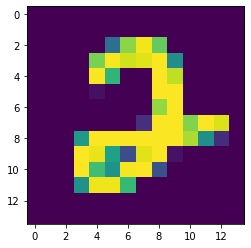

In [18]:
data = pd.read_csv('../inputs/even_mnist.csv', header = None, sep = ' ')


test_data = data.sample(n=3000, random_state=1)
train_data = data.drop(test_data.columns, axis=1)

test_labels = data.iloc[-1 , :]
train_labels = data.iloc[-1 , :]

test_data = test_data/255
train_data = train_data/255

test_data.drop(test_data.tail(1).index,inplace=True)
train_data.drop(train_data.tail(1).index,inplace=True)

foo = np.array(train_data[5])
plt.imshow(np.reshape(foo, (14,14)))

In [116]:
test_data = data.sample(n=3000, random_state=1)
train_data = data.drop(test_data.index)


,0,1,2,3,4,5,6,7,8,9,...,187,188,189,190,191,192,193,194,195,196
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29487,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
29488,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
29489,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
29490,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


In [112]:
data = pd.read_csv('../inputs/even_mnist.csv', header = None, sep = ' ')
images = data.iloc[:,:-1]
labels = data.iloc[:,-1:]
np.array(images.iloc[0])

0

In [75]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(196, 98) 
        self.fc2 = nn.Linear(98, 84)
        self.fc3 = nn.Linear(84, 5)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x))
        
        return x


In [76]:
one_hot_matrix = F.one_hot(torch.arange(0, 5) , num_classes=5)

def one_hot(target, one_hot):
    new_target_vector = one_hot[int(target/2)]
    return new_target_vector



In [77]:
device = torch.device("cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu


In [78]:
targets = torch.from_numpy(np.array(train_labels))
targets[0]

tensor(0)

In [79]:
model = Net().to(torch.device(device))

In [80]:
inputs = torch.from_numpy(np.array(train_data.transpose()))
foo = torch.reshape(inputs[1].float(), (1,-1))
x = model.forward(foo)
x

<ipython-input-75-040632623555>:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc3(x))


tensor([[0.2006, 0.1933, 0.2079, 0.2107, 0.1874]], grad_fn=<SoftmaxBackward>)

In [81]:
learning_rate = 0.01
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [85]:
num_epochs = int(1e4)
display_epochs = int(1e3)

obj_vals= []

inputs = torch.from_numpy(np.array(train_data.transpose()))

loss = nn.CrossEntropyLoss()

for epoch in range(10): 
    for i in range(len(train_data.columns)):
        #input_temp = torch.reshape(inputs[i].float(), (1,-1))
        input_temp = inputs[i].float()
#         print(input_temp)
         
        input_temp = input_temp.to(device)
        target_temp = one_hot(train_labels[i], one_hot_matrix)
        target_temp = target_temp.to(device).float()
        #target_temp = torch.reshape(target_temp, (1,-1)).float()
#         print(target_temp)
#         print('\n')
        optimizer.zero_grad()
        obj_val = loss(model.forward(input_temp), )
#         print(model.forward(input_temp))
#         print('\n')
        
         # clear any previous gradients  
        obj_val.backward() # backprop step, calculates gradient values
        optimizer.step() # apply gradients to model parameters
#         print(obj_val.item())
#         print('\n')
        obj_vals.append(obj_val.item())
    print(f'Epoch [{epoch}/{10}]\tLoss: {obj_val.item()}')

<ipython-input-75-040632623555>:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc3(x))


TypeError: expected np.ndarray (got numpy.int64)

In [ ]:
with torch.no_grad():
    for i in range(len(test_data.columns)):
        

In [23]:
inputs.shape

torch.Size([26492, 196])

In [24]:
inputs[0]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.9333,
        0.9922, 0.9882, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0392, 0.8784, 0.9922, 0.9882, 0.9882, 0.9922, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.9333, 0.9922,
        0.9922, 0.9922, 0.7412, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.6471, 0.9922, 0.9882, 0.2941, 0.4745, 0.0000, 0.9922,
        0.6471, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2235, 0.9882, 0.9412,
        0.1098, 0.0000, 0.0000, 0.0000, 0.9922, 0.7647, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.9647, 0.9922, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        1.0000, 0.7686, 0.0000, 0.0000, 

In [125]:
x = [0.06178394705057144, 0.30302080512046814, 0.32980144023895264, 0.15503233671188354, 0.26321840286254883, 0.3521067500114441, 0.5268468856811523, 0.26762139797210693, 0.2351972460746765, 0.22135350108146667, 0.1368577480316162, 0.24990887939929962, 0.13161517679691315, 0.14755749702453613, 0.10597336292266846, 0.12467000633478165, 0.32064130902290344, 0.17991839349269867, 0.2336931824684143, 0.3936122953891754, 0.10929305851459503, 0.07710918039083481, 0.5118269324302673, 0.27278465032577515, 0.15617668628692627, 0.2251359075307846, 0.2190437763929367, 0.44293445348739624, 0.32804998755455017, 0.07188724726438522, 0.3501746356487274, 0.02306719683110714, 0.2880306839942932, 0.21515606343746185, 0.07441385835409164, 0.1339053064584732, 0.23653863370418549, 0.3561802804470062, 0.12236981093883514, 0.16537171602249146, 0.4138690233230591, 0.38960161805152893, 0.12243333458900452, 0.2217627912759781, 0.12381470948457718, 0.17209544777870178, 0.34490320086479187, 0.22327017784118652, 0.023634444922208786, 0.2220483273267746, 0.32615789771080017, 0.08598817139863968, 0.101287342607975, 0.3007643520832062, 0.07060300558805466, 0.09621142596006393, 0.0758710727095604, 0.1481330245733261, 0.16097930073738098, 0.3431725800037384, 0.07479836791753769, 0.09793470054864883, 0.20079271495342255, 0.1347653716802597, 0.1024264320731163, 0.13304433226585388, 0.31932908296585083, 0.379801481962204, 0.19162610173225403, 0.25983157753944397, 0.29433783888816833, 0.16756463050842285, 0.09246962517499924, 0.15649716556072235, 0.32834911346435547, 0.17704272270202637, 0.04169822484254837, 0.14739665389060974, 0.16777969896793365, 0.0448114238679409, 0.27232611179351807, 0.03816833347082138, 0.07759726047515869, 0.34702804684638977, 0.04591568931937218, 0.714491069316864, 0.1582072377204895, 0.08432818949222565, 0.1623053252696991, 0.15908685326576233, 0.13341973721981049, 0.17779842019081116, 0.05273943394422531, 0.046650148928165436, 0.20052164793014526, 0.1756431758403778, 0.22446872293949127, 0.14337943494319916, 0.09552617371082306, 0.21323229372501373, 0.0473446324467659, 0.2204500287771225, 0.18542706966400146, 0.08086955547332764, 0.06686080247163773, 0.08852546662092209, 0.08397774398326874, 0.057036980986595154, 0.025776535272598267, 0.23031215369701385, 0.1542772352695465, 0.08960455656051636, 0.3079177439212799, 0.07518411427736282, 0.11974138766527176, 0.0614125095307827, 0.12339778989553452, 0.03484252467751503, 0.04920647665858269, 0.08278454095125198, 0.16934306919574738, 0.18870770931243896, 0.09330511838197708, 0.1938878744840622, 0.09603279083967209, 0.20102088153362274, 0.148428812623024, 0.04220506176352501, 0.10499395430088043, 0.11858141422271729, 0.07407832890748978, 0.2690414488315582, 0.33215469121932983, 0.5120801329612732, 0.14638279378414154, 0.23415762186050415, 0.11260052770376205, 0.16333362460136414, 0.10902232676744461, 0.7332723736763, 0.11534244567155838, 0.09810864180326462, 0.19830887019634247, 0.04217763990163803, 0.36375540494918823, 0.03407701104879379, 0.2249208390712738, 0.1156768798828125, 0.1417190134525299, 0.1250482201576233, 0.12588343024253845, 0.04761873185634613, 0.13005298376083374, 0.2085132896900177, 0.1159786581993103, 0.04867997765541077, 0.16360525786876678, 0.0576629638671875, 0.1696096956729889, 0.40674370527267456, 0.06369474530220032, 0.04061828926205635, 0.30100560188293457, 0.11160934716463089, 0.056940943002700806, 0.2251075804233551, 0.15362566709518433, 0.18192467093467712, 0.08603306859731674, 0.12647117674350739, 0.09630860388278961, 0.15048035979270935, 0.2035551816225052, 0.053450144827365875, 0.10729487240314484, 0.17364203929901123, 0.22542937099933624, 0.07452822476625443, 0.13110743463039398, 0.051824819296598434, 0.07770822197198868, 0.0347188301384449, 0.04432258754968643, 0.0859769806265831, 0.025806935504078865, 0.09762739390134811, 0.1935025453567505, 0.09564167261123657, 0.01655120588839054, 0.07244880497455597, 0.10122525691986084, 0.11735010892152786, 0.04475083202123642, 0.012359462678432465, 0.25420910120010376, 0.09420841932296753, 0.1302034705877304, 0.1638278067111969, 0.2144772857427597, 0.6226219534873962, 0.12458167970180511, 0.0951891839504242, 0.020587943494319916, 0.029194429516792297, 0.313015341758728, 0.031201764941215515, 0.11312831193208694, 0.35758569836616516, 0.13310766220092773, 0.13630595803260803, 0.06342823803424835, 0.009091238491237164, 0.21165305376052856, 0.08490278571844101, 0.03651106730103493, 0.024387158453464508, 0.16219407320022583, 0.11301369220018387, 0.16176283359527588, 0.15685999393463135, 0.14789393544197083, 0.06524331867694855, 0.07231611013412476, 0.06108271703124046, 0.1309332400560379, 0.04478829354047775, 0.13804450631141663, 0.08849012106657028, 0.06552109122276306, 0.0316915325820446, 0.23264798521995544, 0.022390950471162796, 0.05543714389204979, 0.2197733372449875, 0.03244006633758545]
y = np.linspace(0,1,len(x))

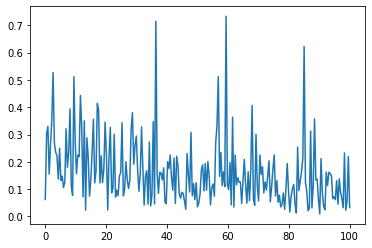

In [126]:
plt.plot(y,x)
plt.yscale()

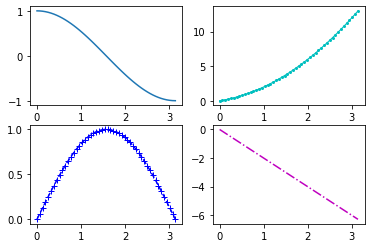

In [127]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
x = np.linspace(0, np.pi)
y2 = -x * 2
y_sin = np.sin(x)
y_cos = np.cos(x)
z = x ** 2 + x
ax1.plot(x, y_cos)
ax2.plot(x, z, 'co-', linewidth = 1, markersize = 2)
ax3.plot(x, y_sin, color = 'blue', marker = '+', linestyle = 'dashed')
ax4.plot(x, y2, 'm-.', markersize = 2)
plt.show()